## Ford Go-Bike Dataset Exploration
## Prepared By: Mohamad AbouElela

This data set represents trips taken by members of the Ford Go Bike service for month of February of 2019.
Data consists of info about trips taken by service's members, their types, their age, their gender, stations of starting and ending trips, duration of trips etc.

### Dataset Dictionary:

1. duration_sec: Trip Duration (seconds)
2. start_time>: Start Time and Date
3. end_time: End Time and Date
4. start_station_id: Start Station ID
5. start_station_name: Start Station Name
6. start_station_latitude: Start Station Latitude
7. start_station_longitude: Start Station Longitude
8. end_station_id: End Station ID
9. end_station_name: End Station Name
10. end_station_latitude: End Station Latitude
11. end_station_longitude: End Station Longitude
12. bike_id: Bike ID
13. user_type: User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
14. member_birth_year: Member Year of Birth
15. member_gender: Member Gender
16. bike_share_for_all_trip: Boolean to track members who are enrolled in the "Bike Share for All" program for low-income residents

In [1]:
# import required liberaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# read dataset file
df = pd.read_csv("fordgobike-feb19.csv")

## Explanatory Data Analysis - EDA

In [3]:
print (f'DataFrame Shape = {df.shape}')
df.head()

DataFrame Shape = (183412, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
# checking for null values
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
# numeric varaiables information
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [7]:
# members gender types
df['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [8]:
# Users types
df['user_type'].value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [9]:
df['start_station_name'].value_counts()

Market St at 10th St                                         3904
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3544
Berry St at 4th St                                           3052
Montgomery St BART Station (Market St at 2nd St)             2895
Powell St BART Station (Market St at 4th St)                 2760
                                                             ... 
Willow St at Vine St                                            9
Parker Ave at McAllister St                                     7
Palm St at Willow St                                            4
21st Ave at International Blvd                                  4
16th St Depot                                                   2
Name: start_station_name, Length: 329, dtype: int64

In [10]:
# check duplicates
df.duplicated().value_counts()

False    183412
dtype: int64

### Observations:
1. Data consists of 183412 rows and 16 columns 
2. Trip Duration time is in seconds
3. Start and End time are not in date time format
4. Dataset is  missing 197 (station id and station name) and 8265 missing (member birthday and member gender) as well
5. No duplicates in our dataset.
6. Some Member_birth_year values need investigations

## Data Cleaning and organizing:

In order to start working with our data we need to clean the dataset following the next steps

1. Drop unwanted ['start_time', 'end_time', 'start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'bike_id'] columns
2. Drop missing values on station_id & Station_name
3. Investigate and drop out of normal member_birth_year values
4. Change duration_sec from seconds to Minutes for easier understanding 
5. Change member_birth_year to member_age for easier understanding

In [60]:
# drop unwanted columns
cols_drop = ['start_time', 'end_time', 'start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'bike_id']
df1 = df.drop(columns= cols_drop, axis = 1)

In [61]:
df1.shape

(183412, 9)

In [62]:
df1.head()

,duration_sec,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,Customer,1984.0,Male,No
1,42521,23.0,The Embarcadero at Steuart St,81.0,Berry St at 4th St,Customer,NaN,NaN,No
2,61854,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),Customer,1972.0,Male,No
3,36490,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,Subscriber,1989.0,Other,No
4,1585,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,Subscriber,1974.0,Male,Yes


In [65]:
# drop all NaN values 
df2 = df1.dropna()
df2.shape

(174952, 9)

In [66]:
# check no NaN values
df2.isna().sum()

duration_sec               0
start_station_id           0
start_station_name         0
end_station_id             0
end_station_name           0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [67]:
# check member birth year values
df2['member_birth_year'].value_counts()

1988.0    10214
1993.0     9323
1989.0     8967
1990.0     8640
1991.0     8484
          ...  
1930.0        1
1910.0        1
1927.0        1
1928.0        1
1878.0        1
Name: member_birth_year, Length: 75, dtype: int64

In [68]:
# investigate member birth year value of 1878 which is clearly wrong
id = df2[df2['member_birth_year']== 1878]
id

,duration_sec,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip
27370,1474,15.0,San Francisco Ferry Building (Harry Bridges Pl...,386.0,24th St at Bartlett St,Customer,1878.0,Female,No


In [69]:
# drop wrong birth year value 
df3  = df2.drop(index = id.index, axis =0)
df3.shape

(174951, 9)

In [70]:
# change duration sec to duration min for easy understanding

df3['duration_min'] = df3['duration_sec']/60
df3.head()

,duration_sec,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min
0,52185,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,Customer,1984.0,Male,No,869.750000
2,61854,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),Customer,1972.0,Male,No,1030.900000
3,36490,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,Subscriber,1989.0,Other,No,608.166667
4,1585,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,Subscriber,1974.0,Male,Yes,26.416667
5,1793,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,Subscriber,1959.0,Male,No,29.883333


In [71]:
# change member birth year to member age
df3['member_age'] = 2019 - df3['member_birth_year']
df3.head()

,duration_sec,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,member_age
0,52185,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,Customer,1984.0,Male,No,869.750000,35.0
2,61854,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),Customer,1972.0,Male,No,1030.900000,47.0
3,36490,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,Subscriber,1989.0,Other,No,608.166667,30.0
4,1585,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,Subscriber,1974.0,Male,Yes,26.416667,45.0
5,1793,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,Subscriber,1959.0,Male,No,29.883333,60.0


In [72]:
# drop duration_sec and member birth year columns
drop_cols = ['duration_sec', 'member_birth_year']
df_final = df3.drop(columns = drop_cols, axis = 1)
df_final.head()

,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_gender,bike_share_for_all_trip,duration_min,member_age
0,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,Customer,Male,No,869.750000,35.0
2,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),Customer,Male,No,1030.900000,47.0
3,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,Subscriber,Other,No,608.166667,30.0
4,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,Subscriber,Male,Yes,26.416667,45.0
5,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,Subscriber,Male,No,29.883333,60.0


## Visual Explorations
### Univairate Exploration

#### Features of intrest
1. Gender
2. Users type
3. Age
4. Location 
5. Duration

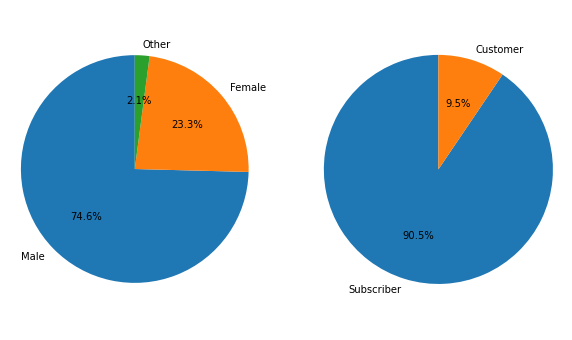

In [113]:
# Explore members gender and user type

plt.figure(figsize = [10, 6])
plt.subplot(1,2,1)
sorted_gender = df_final['member_gender'].value_counts()
plt.pie(sorted_gender, labels=sorted_gender.index, startangle = 90, autopct = '%1.1f%%')
plt.axis('square')

plt.subplot(1,2,2)
sorted_type = df_final['user_type'].value_counts()
plt.pie(sorted_type, labels = sorted_type.index, startangle = 90, autopct = '%1.1f%%')
plt.axis('equal');

#### Males represent 75% of the dataset
#### More than 90% of users are Subscribers to the ford go bike service 

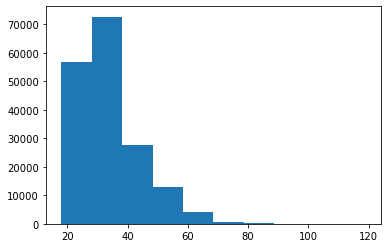

In [114]:
# member age exploration

age_bins = np.arange(10, df_final['member_age'].max()+4, 4)
plt.hist(data= df_final, x = 'member_age');

#### The age distrubution is right skewed with members of age between 30 to 40 years representing major partition of the dataset` 

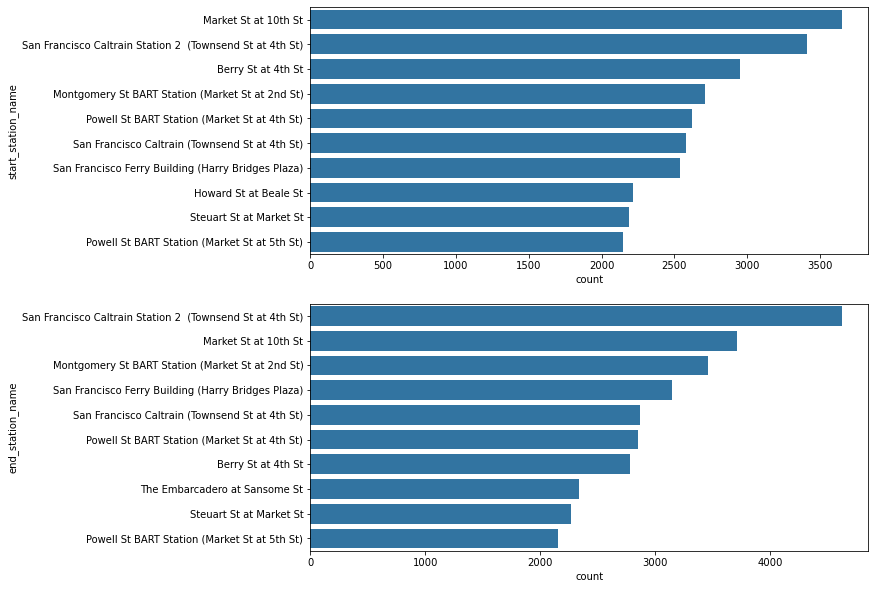

In [115]:
# Explore Top ten start stations vs Top ten end stations
base_color = sb.color_palette()[0]
plt.figure(figsize = [10, 10])
plt.subplot(2,1,1)
start_order = df_final['start_station_name'].value_counts()[:10]
df_start = df_final.loc[df_final['start_station_name'].isin(start_order.index)]
sb.countplot(data = df_start, y = 'start_station_name', order = start_order.index, color = base_color)
plt.subplot(2,1,2)
end_order = df_final['end_station_name'].value_counts()[:10]
df_end = df_final.loc[df_final['end_station_name'].isin(end_order.index)]
sb.countplot(data = df_end, y = 'end_station_name', order = end_order.index, color = base_color);

#### Both (Market st, San Francisco caltrain station2) are the highest starting and destination stations.
#### We can use this data to increase number of available bikes at these stations 

In [22]:
df_final['duration_min'].describe()

count    174951.000000
mean         11.733306
std          27.370143
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

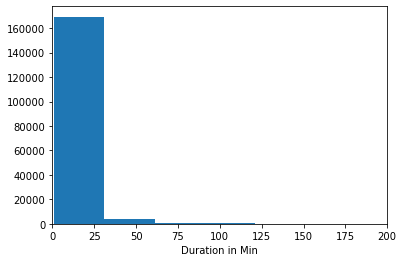

In [98]:
# duration exploration
bins = np.arange(df_final['duration_min'].min(), df_final['duration_min'].max()+ 30, 30)
plt.hist(df_final['duration_min'], bins = bins)
plt.xlabel ('Duration in Min')
plt.xlim((0,200));

### We Notice most of the bike ride duration is below 30 min, however the duration have a long tail of outliers may be due to users keeping their bike rented during work or forget to log off after finishing rides.

## Bivairate Exploration

#### Features of intrest

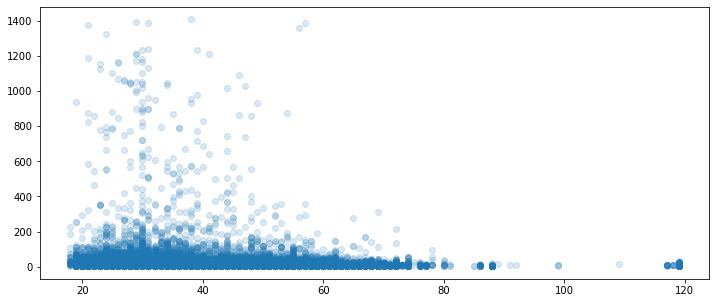

In [104]:
# check relation between age and ride duration
plt.figure(figsize = [12,5])
plt.scatter(x = df_final['member_age'], y = df_final['duration_min'], alpha = 1/6);


#### We notice that members aged between 25-40 years tend to do the longest rides durations. 
#### As mentioned before an interesting observation is that some customers may be keeping there bikes rented during working hours or forget to log off as we observe long rides over 10 hours and up to 20 hours.    

In [80]:
# sort level of catgorical variables 
object_columns = ['user_type', 'member_gender']

def obj_cat (object_columns):
    for i in object_columns:
        col_order = df_final[i].value_counts().index
        cat = pd.api.types.CategoricalDtype(ordered = True, categories = col_order)
        df_final[i] = df_final[i].astype(cat)
obj_cat(object_columns)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174951 entries, 0 to 183411
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   start_station_id         174951 non-null  float64 
 1   start_station_name       174951 non-null  object  
 2   end_station_id           174951 non-null  float64 
 3   end_station_name         174951 non-null  object  
 4   user_type                174951 non-null  category
 5   member_gender            174951 non-null  category
 6   bike_share_for_all_trip  174951 non-null  object  
 7   duration_min             174951 non-null  float64 
 8   member_age               174951 non-null  float64 
dtypes: category(2), float64(4), object(3)
memory usage: 9.0+ MB


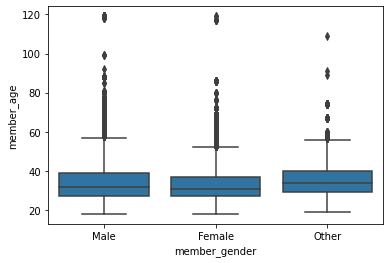

In [116]:
# check relation between gender and age to try to find the average male/female age in the dataset

sb.boxplot(data = df_final, x = 'member_gender', y = 'member_age', color = base_color);

#### Although Males represent 75% of the dataset, the plot show the average age for males and females are quite equal around 33 years of age 

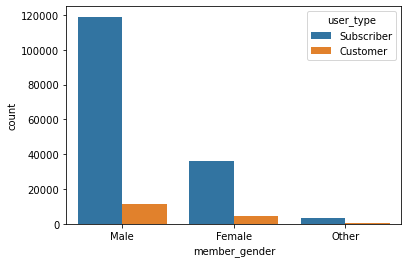

In [82]:
# Relation between member genders and user types

sb.countplot(data = df_final, x = 'member_gender', hue = 'user_type');

#### This plot is very informative and we can observe:
* Higher numbers of subscriber members VS customer members in both males and females which can be due to easy and cheap subscribing fees, also may be due fare difference between subscribers and customers. 
* As mentioned before Males represent over 75% of the data set and we notice from the plot that around 90% of males are subscribrs to the service

## Multivariate exploration

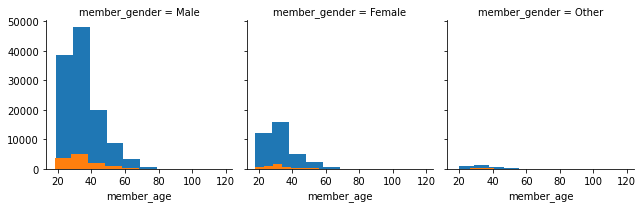

In [87]:
g = sb.FacetGrid(data = df_final, col = 'member_gender', hue = 'user_type')
g.map(plt.hist, 'member_age');

### As observed from previous plots subscribers percentage is higher than customers regardeless of the gender

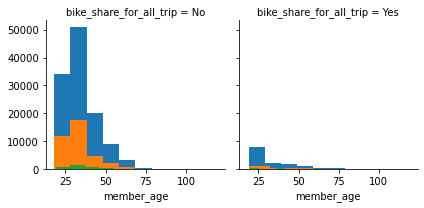

In [117]:
g = sb.FacetGrid(data = df_final, col = 'bike_share_for_all_trip', hue = 'member_gender', legend_out = True)
g.map(plt.hist, 'member_age');

#### We Notice that most users prefer not to share the bikes regardless of there gender  

## Exploration Summary

In this Slide deck We will try to explain the Ford Go-Bike dataset findings in summary for easy of understanding by any users.
we will focus on:
1. Overall explanation for dataset gender distribution and average gender ages
2. Age and Ride duration relation
3. Most active stations

## Dataset Overview

The dataset represents trips taken by 183412 members of the Ford Go Bike service for month of February of 2019.
Data consists of info about trips taken by service's members, their types, their age, their gender, stations of starting and ending trips, duration of trips etc.

## (Visualization 1)

The following Visualization consists of two graphs, the first pie chart represent the gender types of our dataset with percentage of each gender type. The second box plot shows the age quartile distribution of each gender type. 

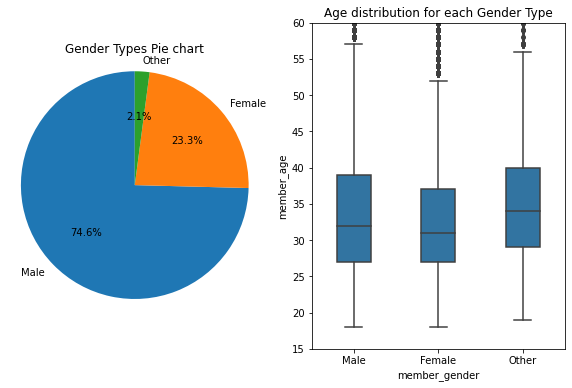

In [133]:
plt.figure(figsize = [10, 6])

plt.subplot(1,2,1)
sorted_gender = df_final['member_gender'].value_counts()
plt.pie(sorted_gender, labels=sorted_gender.index, startangle = 90, autopct = '%1.1f%%')
plt.axis('square')
plt.title('Gender Types Pie chart')

plt.subplot(1,2,2)
sb.boxplot(data = df_final, x = 'member_gender', y = 'member_age', color = base_color, width = 0.4)
plt.ylim((15,60))
plt.title("Age distribution for each Gender Type");

## (Visualization 2)
The plot illustrate the relation between Age and Ride duration time in minutes

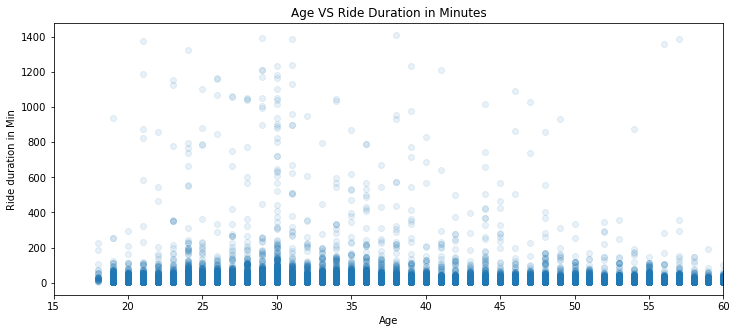

In [135]:
plt.figure(figsize = [12,5])
plt.scatter(x = df_final['member_age'], y = df_final['duration_min'], alpha = 1/10)
plt.xlabel('Age')
plt.ylabel ('Ride duration in Min')
plt.xlim((15,60))
plt.title('Age VS Ride Duration in Minutes');

## (Visualization 3)
The plot shows the top ten start station and top ten end stations pf our dataset

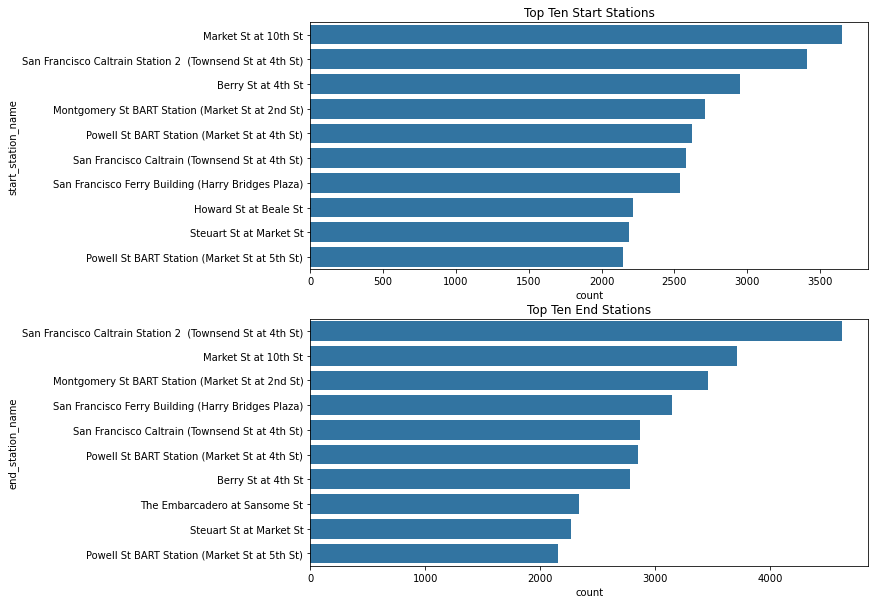

In [136]:
base_color = sb.color_palette()[0]
plt.figure(figsize = [10, 10])
plt.subplot(2,1,1)
start_order = df_final['start_station_name'].value_counts()[:10]
df_start = df_final.loc[df_final['start_station_name'].isin(start_order.index)]
sb.countplot(data = df_start, y = 'start_station_name', order = start_order.index, color = base_color)
plt.title('Top Ten Start Stations')
plt.subplot(2,1,2)
end_order = df_final['end_station_name'].value_counts()[:10]
df_end = df_final.loc[df_final['end_station_name'].isin(end_order.index)]
sb.countplot(data = df_end, y = 'end_station_name', order = end_order.index, color = base_color)
plt.title('Top Ten End Stations');